In [19]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
# table of standard identification
ids= pd.read_table("./data/standard_identified_all.txt", sep='\t', dtype=str, index_col=0)
ids.head(1)

,pvalue,level2_gnps,test_statistic,obs_mz,obs_rt,level_1_identification,trend
#featureID,,,,,,,
355.2629055490768_3.7938971153846124,1.00E-04,Spectral Match to Cholic acid from NIST14,-56.24855072,355.2629055,3.793897115,a-Muricholic acid,higher in Air


In [21]:
# table of differential features
diff=pd.read_table("./data/allFeatures_dsfdr.txt", sep='\t', dtype=str, index_col=0)
diff['test_statistic']=pd.to_numeric(diff['test_statistic'])
diff.head(1)

,10422.24.F.5,10422.29.F.6,10422.27.F.8,10422.26.F.12,10422.27.F.13,10422.23.F.13,10422.26.F.4,10422.28.F.9,10422.26.F.3,10422.17.F.4,...,10422.17.F.9,10422.18.F.4,10422.26.F.8,10422.18.F.12,10422.24.F.12,10422.25.F.11,10422.24.F.6,10422.29.F.5,pvalue,test_statistic
357.2784138555112_5.010000161030595,691709654.0918734,257880046.3735363,191058286.78642443,422566734.2247869,376935441.72155833,489175313.4030075,287578775.50227946,180930592.9788039,276006980.50799865,604022226.8888701,...,473649358.599624,664625490.6238595,236938374.0911361,406783842.14948446,584985200.8679138,125840175.61819912,420656821.07987267,521778706.1405312,9.999000099991662e-05,43.499758


In [22]:
#feature table with gnps identification
table=pd.read_table("./data/haddad_6weeks_allFeatures_pqn_matched_wIDs.txt", sep='\t', dtype=str, index_col="#featureID")
table.head(1)

,10422.17.F.10,10422.17.F.11,10422.17.F.12,10422.17.F.13,10422.17.F.3,10422.17.F.4,10422.17.F.5,10422.17.F.6,10422.17.F.7,10422.17.F.8,...,10422.32.F.4,10422.32.F.5,10422.32.F.6,10422.32.F.7,10422.32.F.8,10422.32.F.9,obs_mz,obs_rt,level2_gnps,level_1_identification
#featureID,,,,,,,,,,,,,,,,,,,,,
132.1020923761221_0.4491537660256411,417818365.0404715,599176692.2172579,271010923.09797156,374372770.02204,394579148.9187016,237869662.99171597,606701783.7713683,148560675.25142795,422735443.6537102,401469952.3340521,...,278835766.3882692,591675934.303529,572151910.6403494,439901099.2879787,304919206.69614714,721050657.3552696,132.1020923761221,26.949225961538467,none,none


In [21]:
# retaining only identified features in the table
table = table.loc[ids.index]
table['level_1_identification'] = ids['level_1_identification']
table.shape

(33, 186)

In [7]:
# assigining unique feature index to identified features

f_pval = {}
f_tstar={}
pvals = []
teststat=[]
count = 0

for fid in table.index:
    pvals.append(diff.loc[fid, 'pvalue'])
    teststat.append(diff.loc[fid, 'test_statistic'])
    
    fname=table.loc[fid, 'level_1_identification'] + str(count)
    table.loc[fid,'feature_index'] = fname
    
    table.loc[fid,'pvalue']=diff.loc[fid, 'pvalue']
    table.loc[fid,'test_statistic']=diff.loc[fid, 'test_statistic']
    f_pval[fname] = diff.loc[fid, 'pvalue']
    f_pval[fname] = diff.loc[fid, 'test_statistic']
    
    count+=1

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [36]:
len(table.feature_index.unique())

33

In [27]:
#metadata file
md = pd.read_table("../tables/haddad_6week_metadata_matched_rare2k.txt", sep='\t', dtype=str, index_col="#SampleID")
md.shape

(182, 69)

### plotting trends

In [28]:
table=table.drop(['level2_gnps', 'pvalue', 'level_1_identification'], axis=1)
datap=table.set_index('feature_index').T

In [29]:
datap.loc['test_statistic']=pd.to_numeric(datap.loc['test_statistic'])
datap=datap.sort_values(by='test_statistic', axis=1, ascending=True)

In [30]:
datap.head(1)

feature_index,a-Muricholic acid0,a-Muricholic acid1,a-Muricholic acid2,a-Muricholic acid3,Ursodeoxycholic acid32,Hyodeoxycholic acid22,Cholic acid8,Cholic acid9,Taurocholic acid26,Taurocholic acid27,...,Cholic acid13,Cholic acid14,Cholic acid15,Chenodeoxycholic acid4,Taurodeoxycholic acid30,Chenodeoxycholic acid5,Chenodeoxycholic acid6,Taurodeoxycholic acid31,Enterolactone21,Chenodeoxycholic acid7
10422.17.F.10,415893132.18042284,386469537.32374394,290197190.1299533,253513371.36788684,463892515.8482894,891232101.1525699,308231751.0349529,578923665.7657641,232626381.180995,446664297.2508974,...,633580248.3333491,464497143.4832501,490407096.69482565,370468848.62319195,1035859283.5477467,350979705.1323471,386548402.2268363,1484731742.0698504,569729364.6947503,402075508.68121415


In [31]:
datap = datap.drop(['test_statistic'], axis=0)
datap=datap.apply(pd.to_numeric)

In [32]:
for s1 in datap.index:
    for s2 in md.index:
        if s1==s2:
            datap.loc[s1, "exposure_type"] = md.loc[s2, "exposure_type"]
            datap.loc[s1, "age"]=md.loc[s2, "age"]

In [33]:
datap.head(1)

feature_index,a-Muricholic acid0,a-Muricholic acid1,a-Muricholic acid2,a-Muricholic acid3,Ursodeoxycholic acid32,Hyodeoxycholic acid22,Cholic acid8,Cholic acid9,Taurocholic acid26,Taurocholic acid27,...,Cholic acid15,Chenodeoxycholic acid4,Taurodeoxycholic acid30,Chenodeoxycholic acid5,Chenodeoxycholic acid6,Taurodeoxycholic acid31,Enterolactone21,Chenodeoxycholic acid7,exposure_type,age
10422.17.F.10,4.158931e+08,3.864695e+08,2.901972e+08,2.535134e+08,4.638925e+08,8.912321e+08,3.082318e+08,5.789237e+08,2.326264e+08,4.466643e+08,...,4.904071e+08,3.704688e+08,1.035859e+09,3.509797e+08,3.865484e+08,1.484732e+09,5.697294e+08,4.020755e+08,IHH,14.5


/Users/priya/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


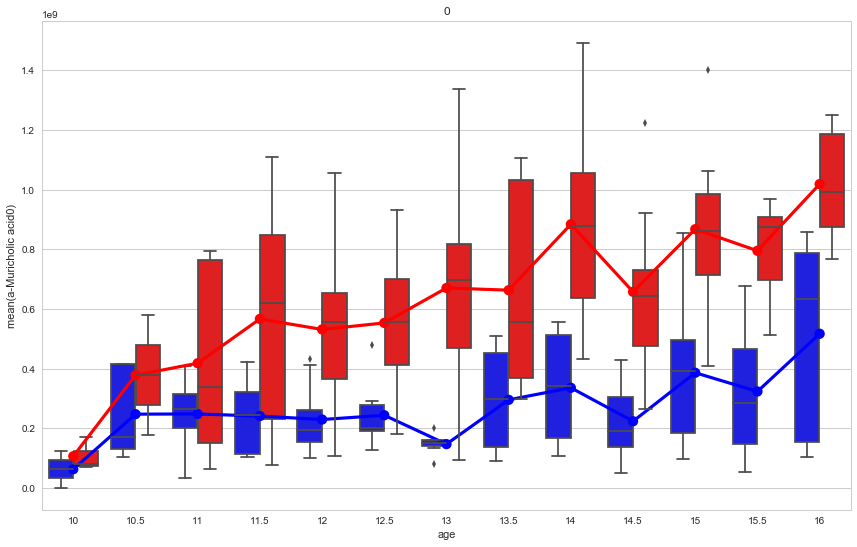

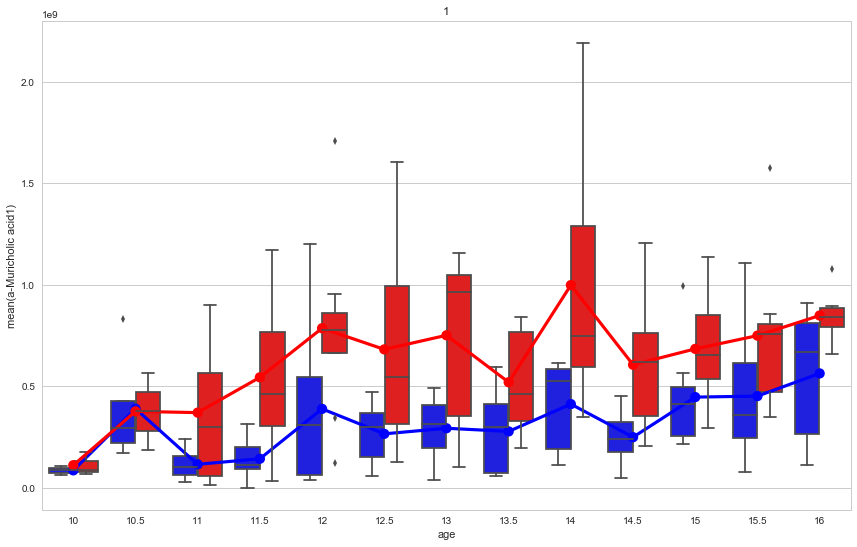

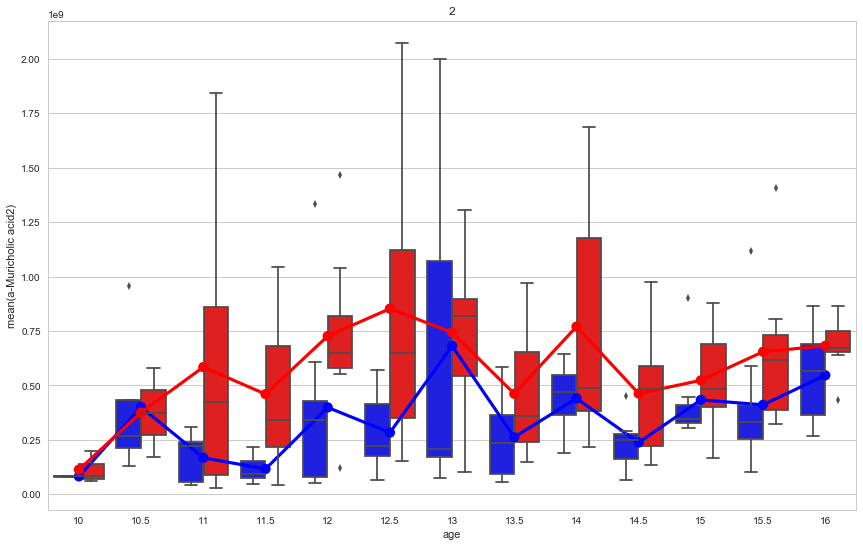

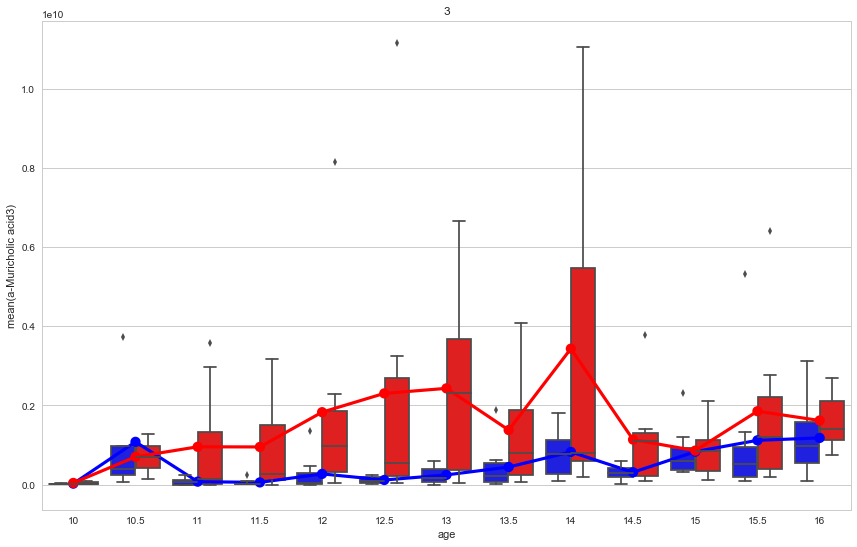

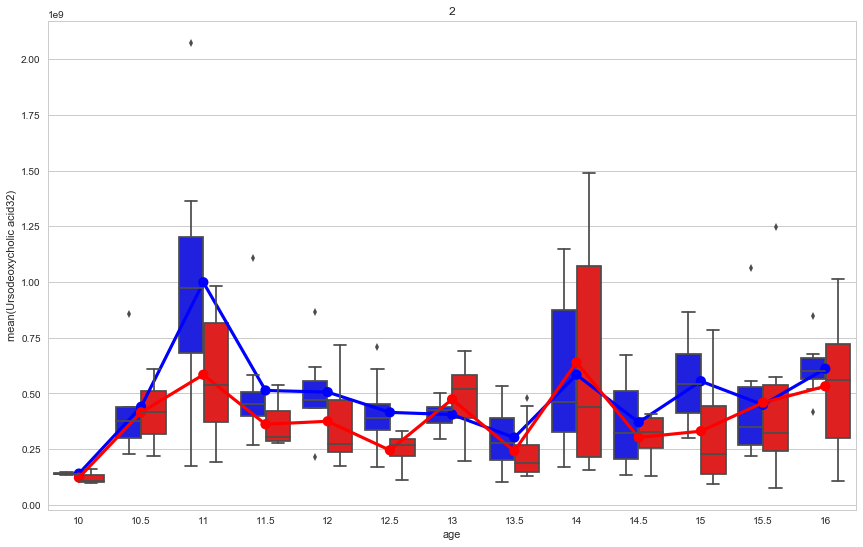

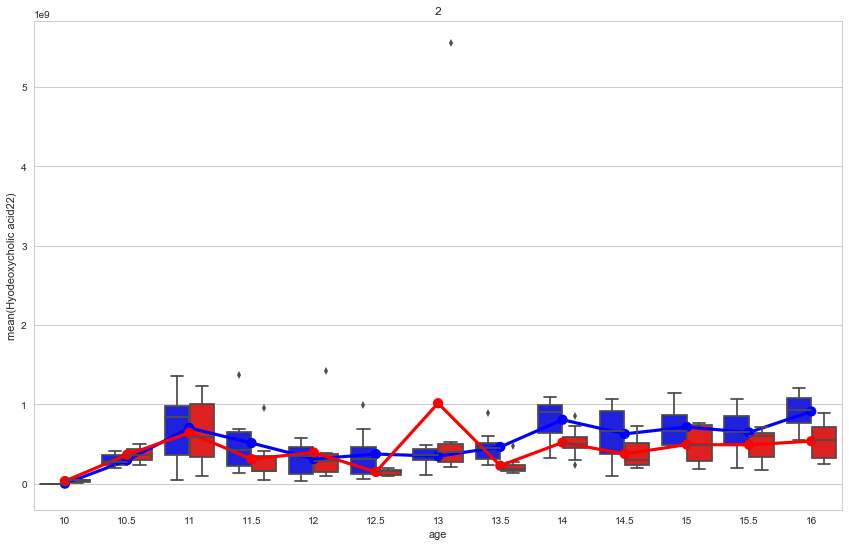

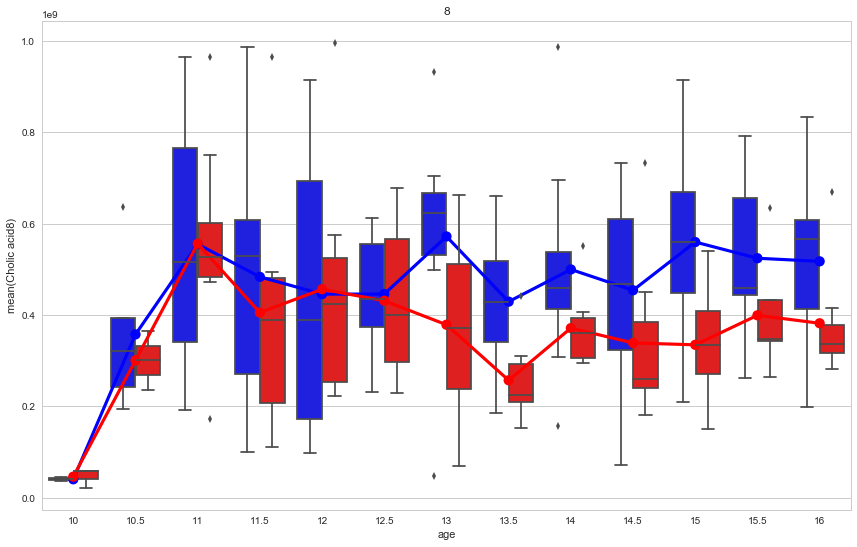

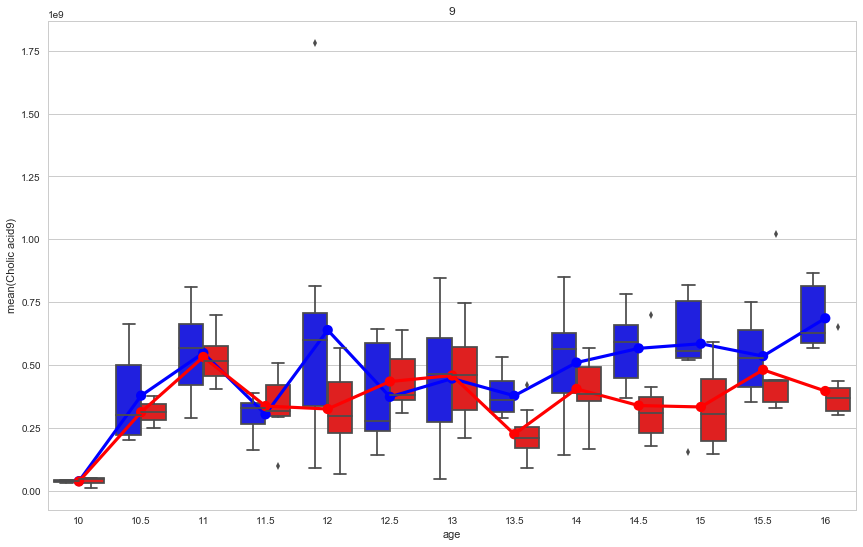

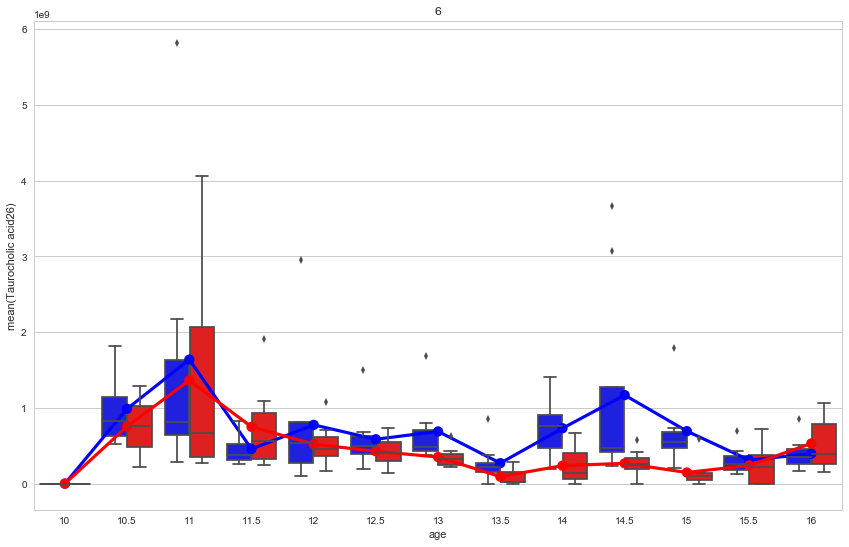

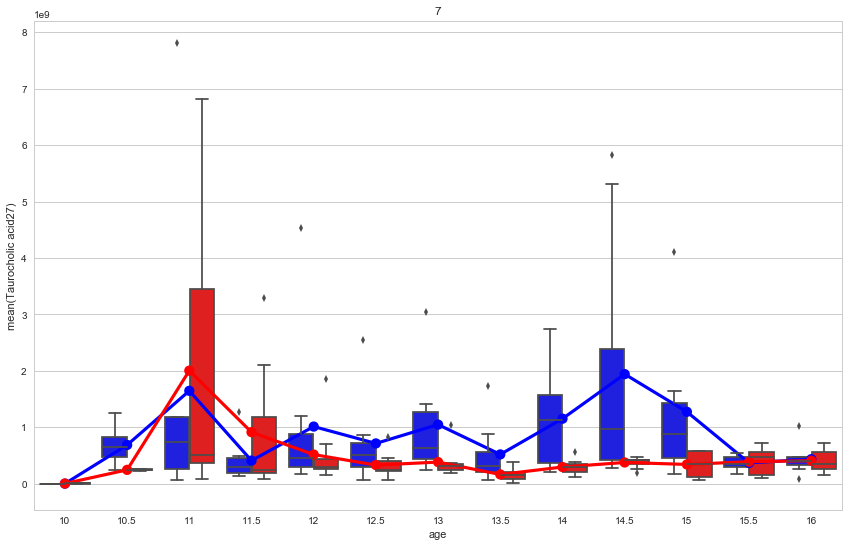

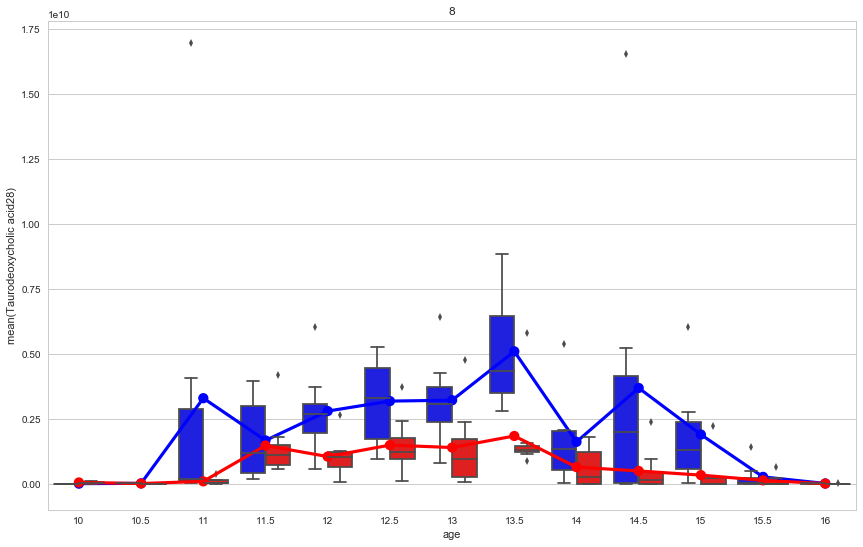

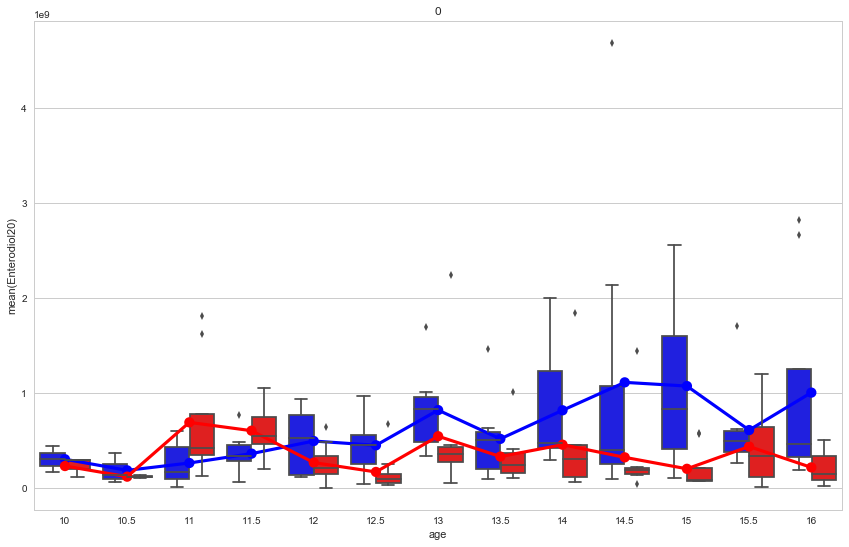

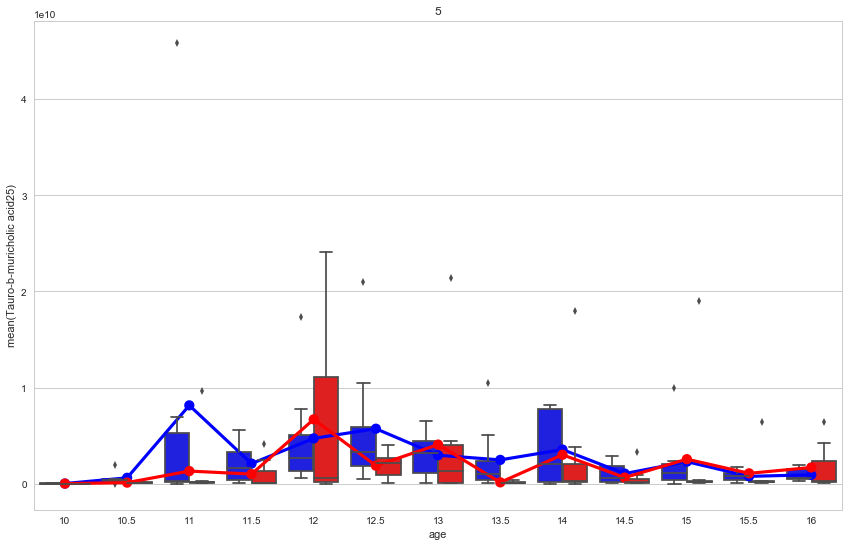

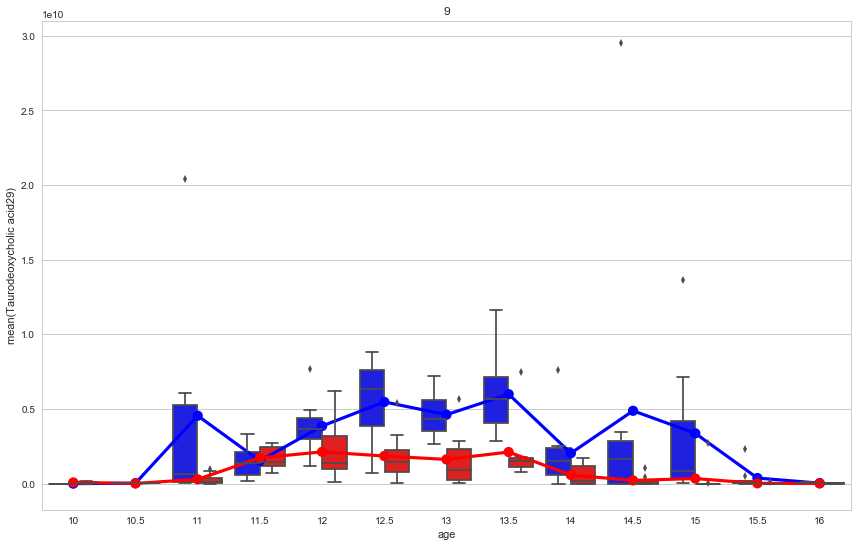

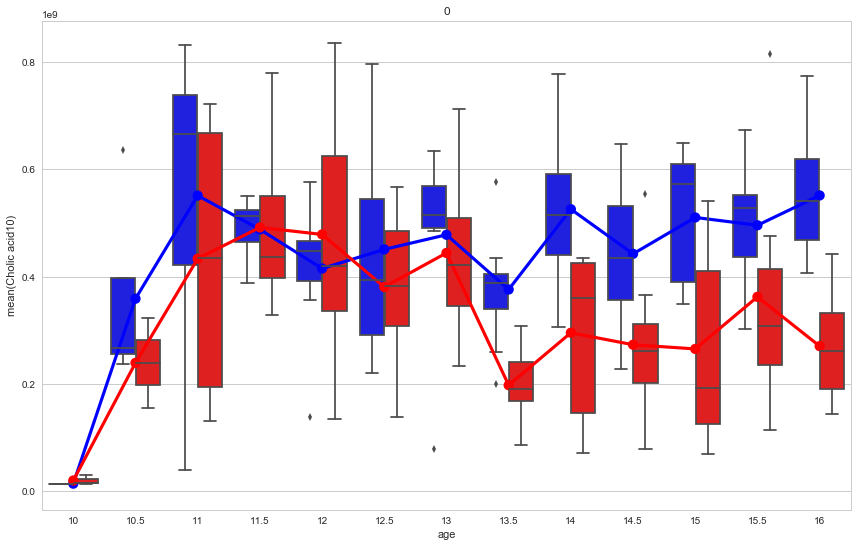

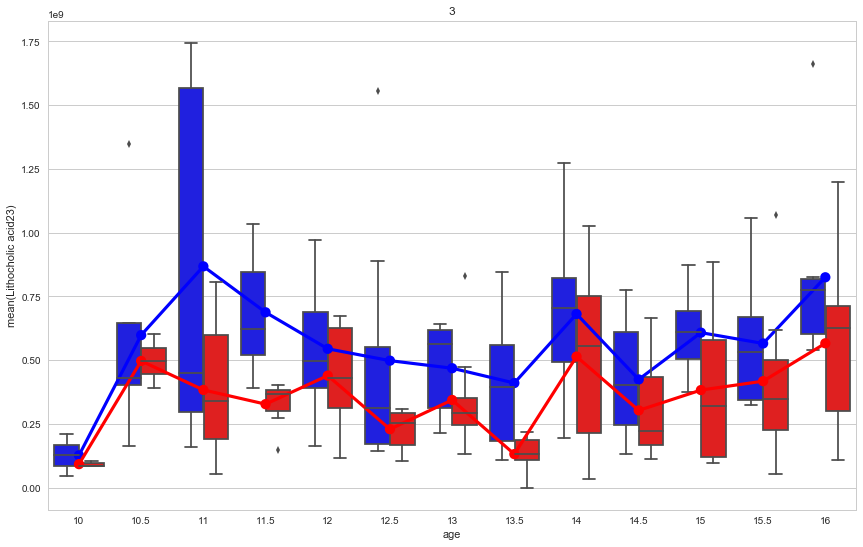

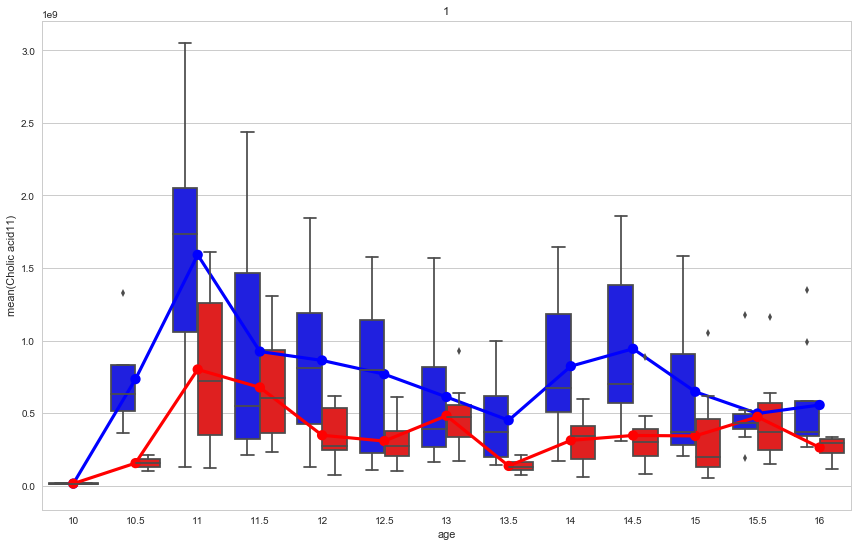

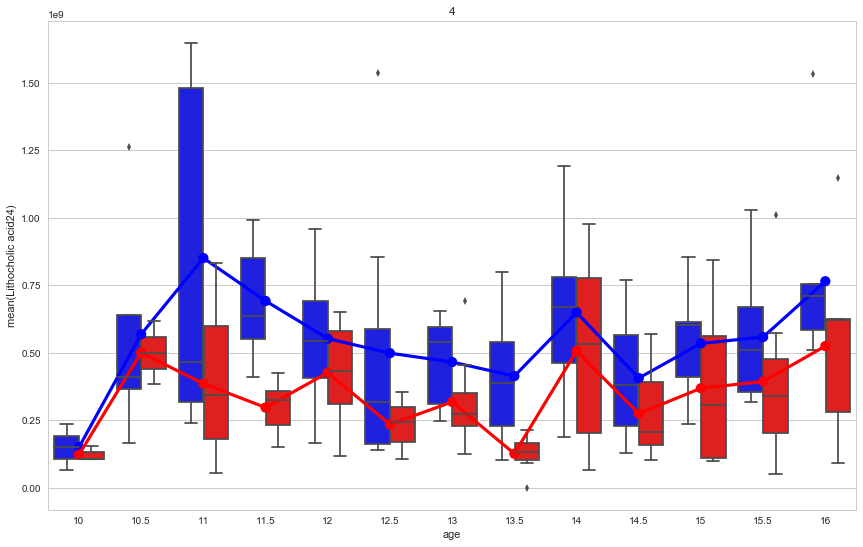

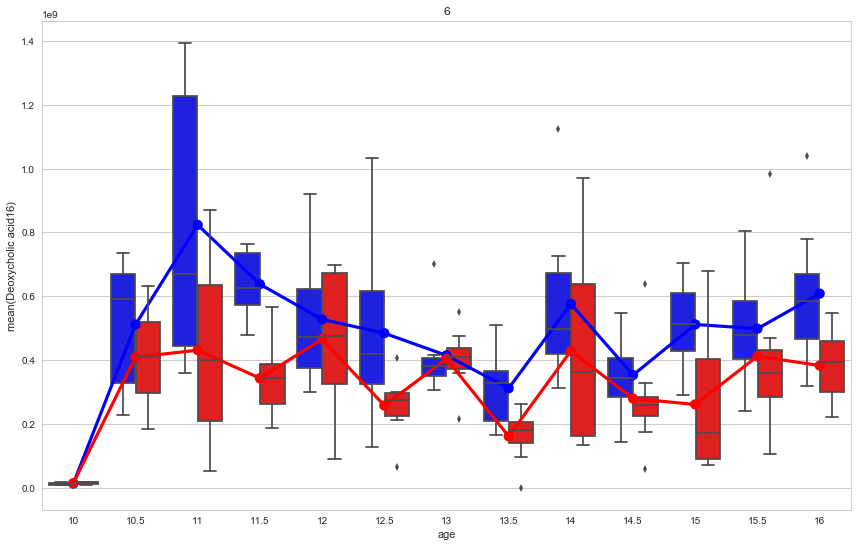

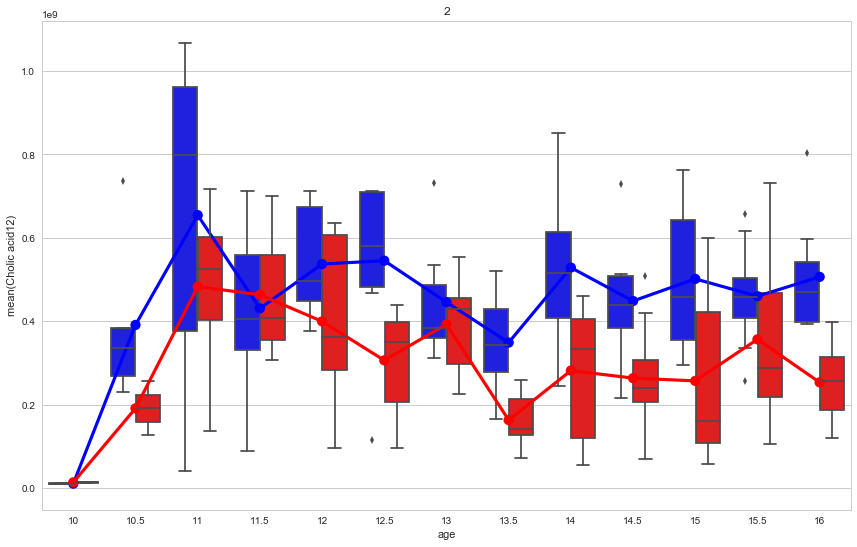

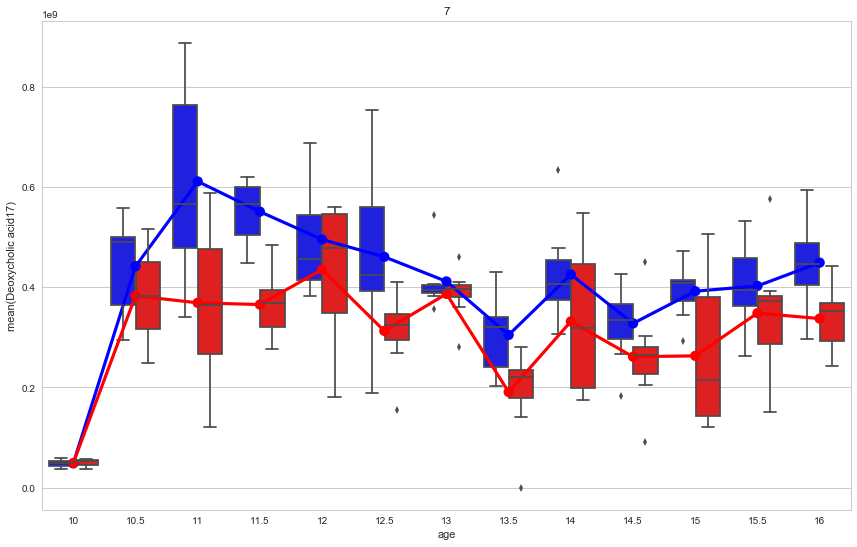

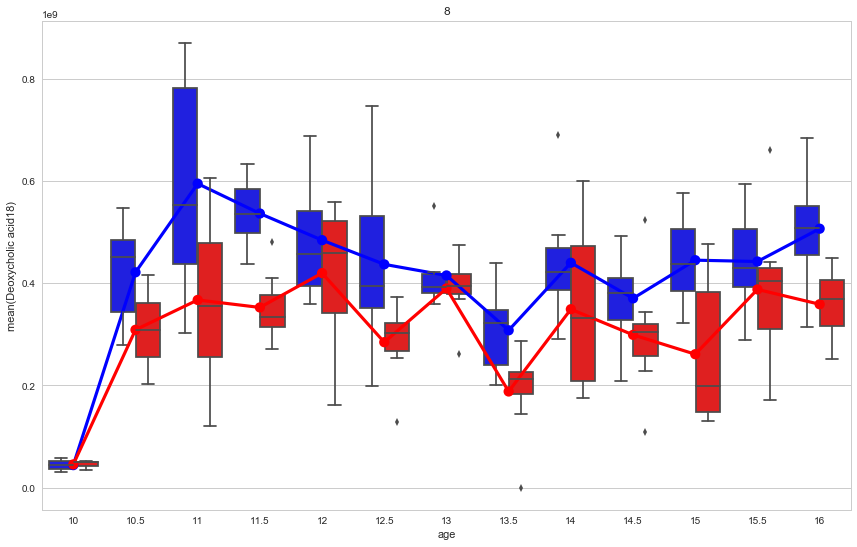

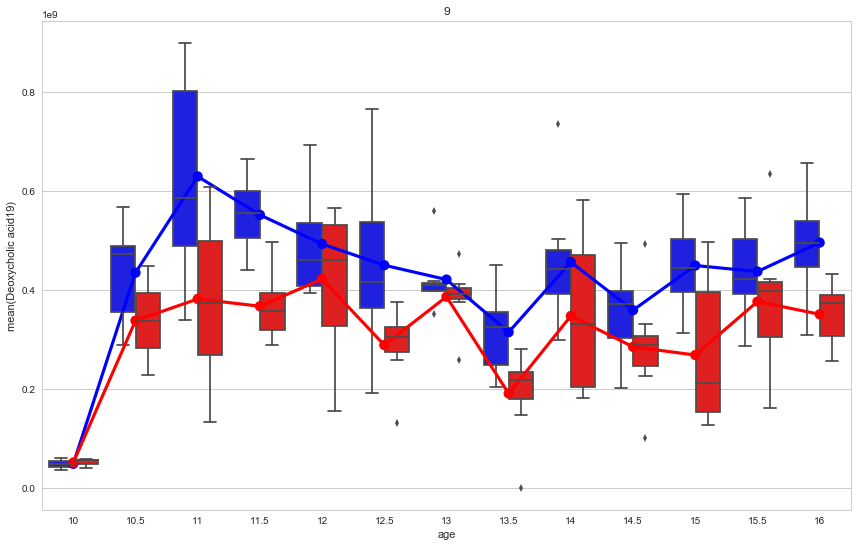

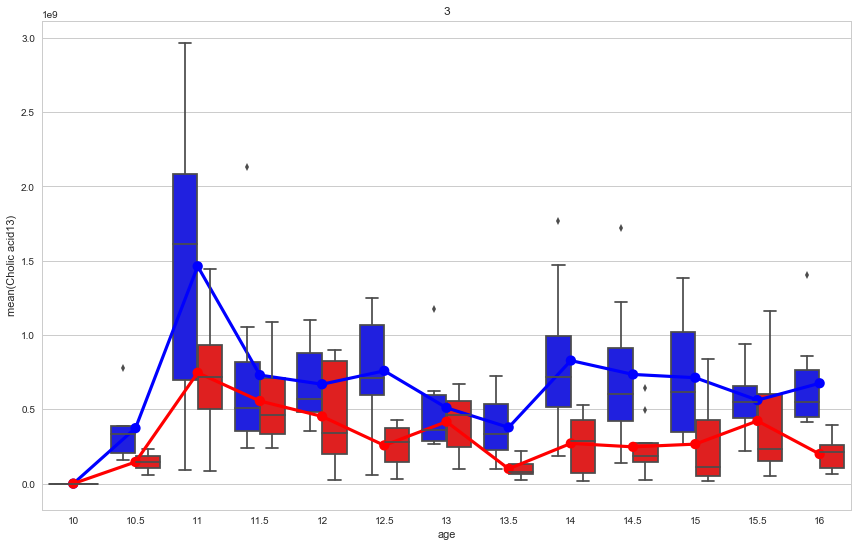

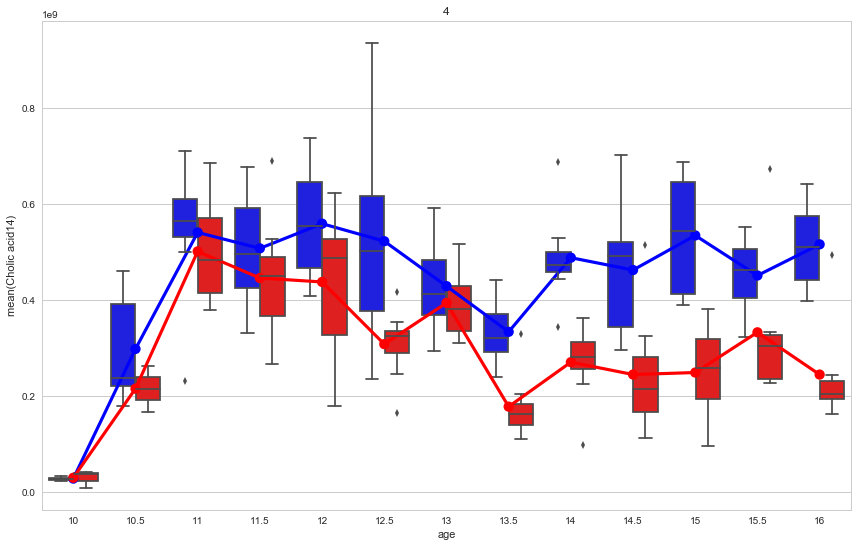

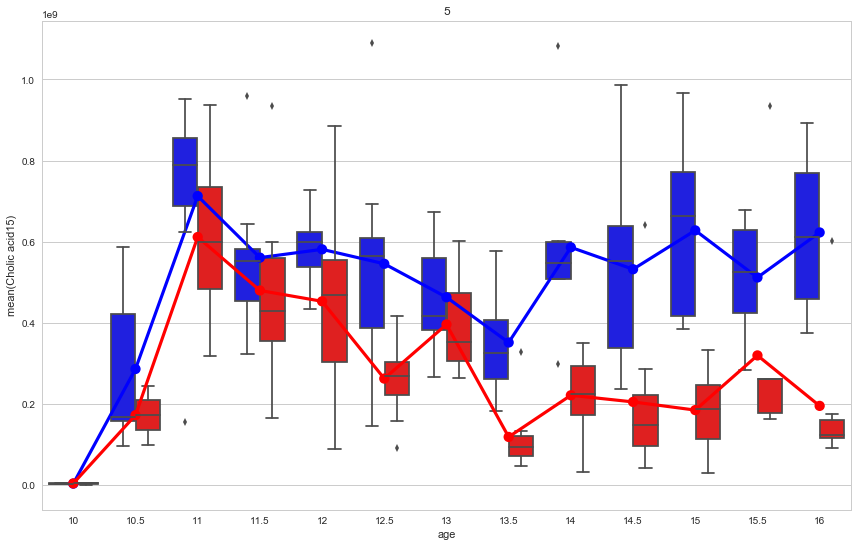

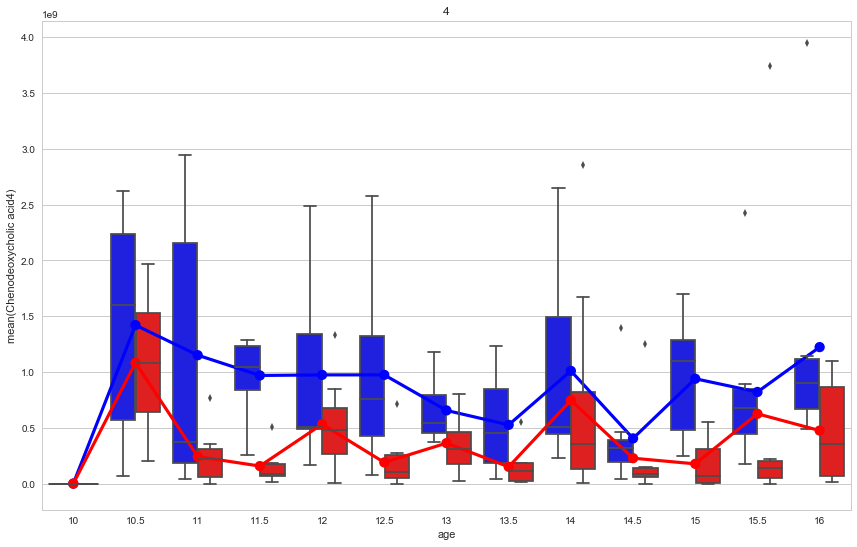

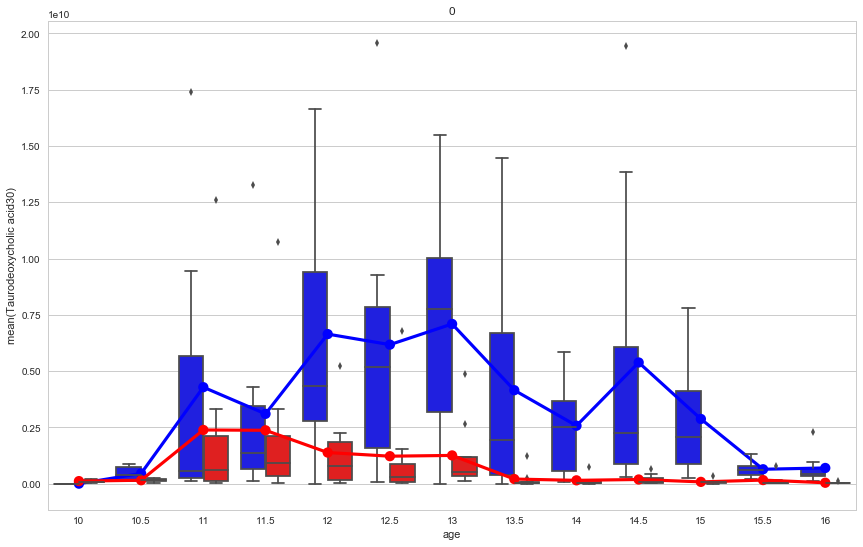

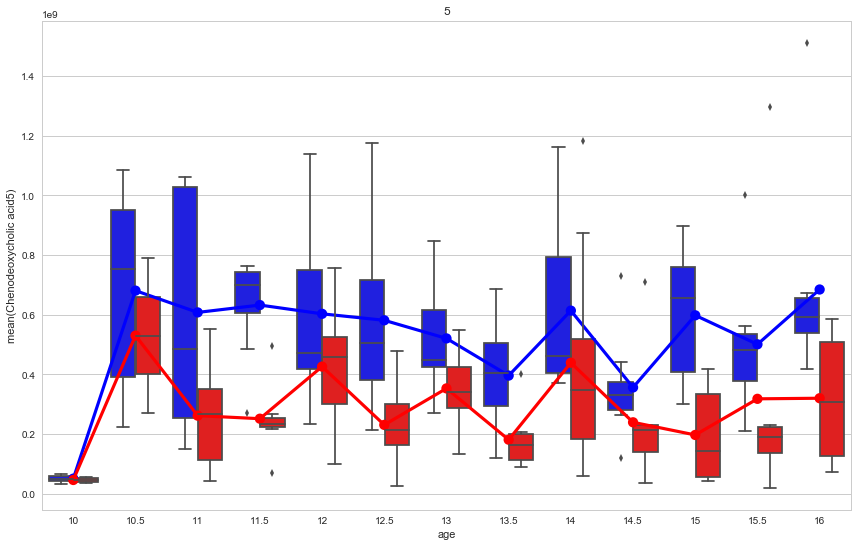

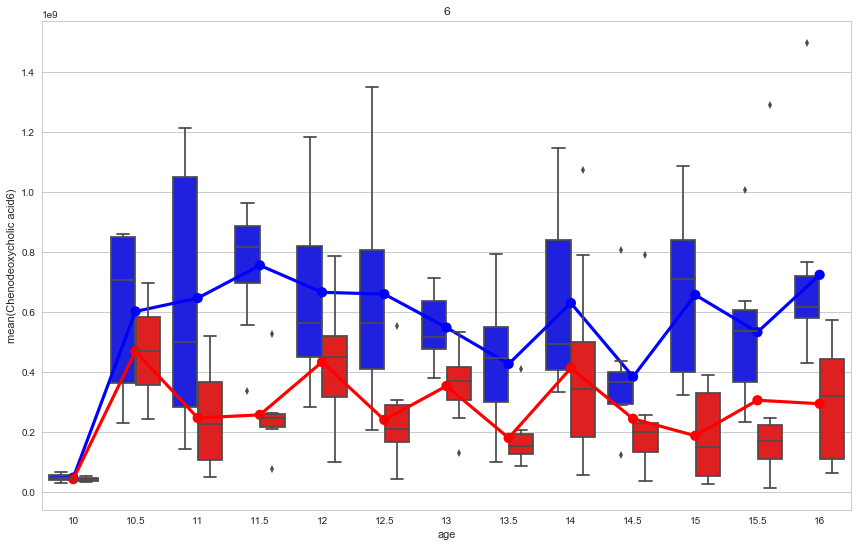

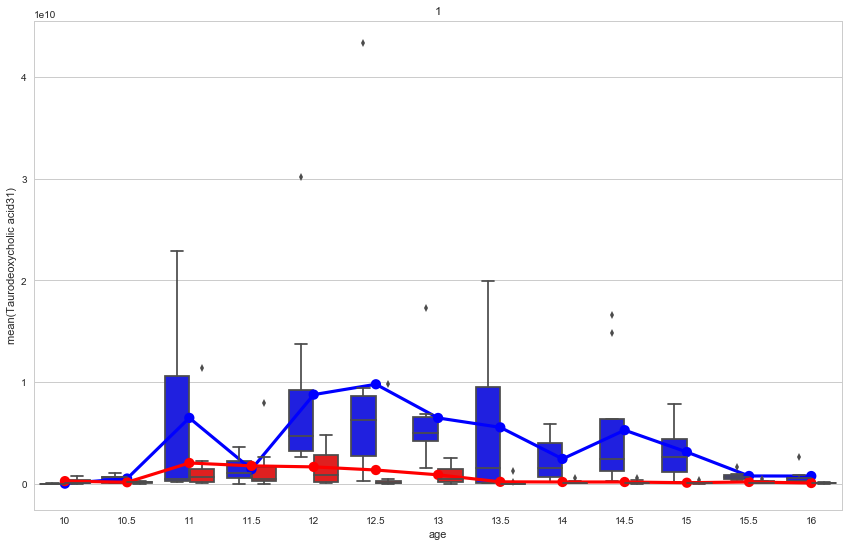

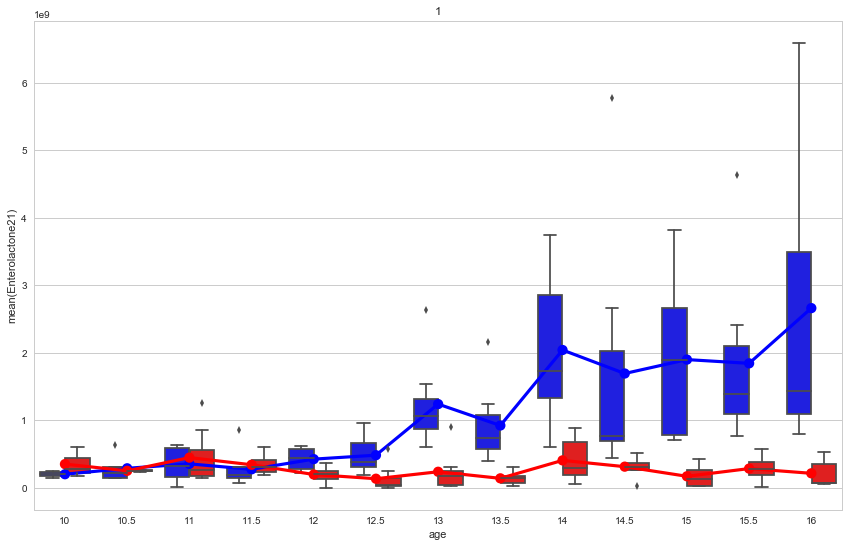

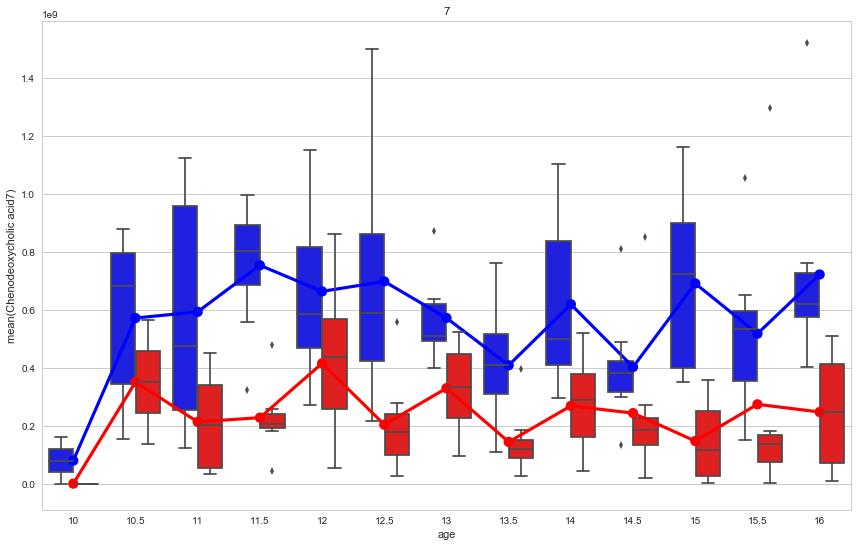

In [35]:
for otu in datap.columns[:-2]:
    fig, ax = plt.subplots()
    fig.set_size_inches(9*1.61, 9)
    count=1
    colr={'IHH': '#0000ff', 'Air': '#ff0000'}
    dd=datap[[otu, 'age', 'exposure_type']]
    g = sns.boxplot(x='age', y=otu, hue='exposure_type', data=dd, palette=colr)
    g=sns.pointplot(x='age', y=otu, hue='exposure_type', data=dd, 
                     kind='point', size=5, palette=colr, ci = None)
    sns.plt.title(otu[-1])
    ax.legend_.remove()
    g.get_figure().savefig("./figures/metabolites/%s.pdf" %otu, bbox_to_inches='tight')